In [45]:
import pandas as pd
import numpy as np

In [46]:
df = pd.read_csv("Bengaluru_House_Data.csv")

In [47]:
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [48]:
df.shape

(13320, 9)

In [49]:
df.isna()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...
13315,False,False,False,False,False,False,False,False,False
13316,False,False,False,False,True,False,False,True,False
13317,False,False,False,False,False,False,False,False,False
13318,False,False,False,False,False,False,False,False,False


In [6]:
df.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [51]:
df.drop(columns = ['society'], inplace = True)

In [52]:
df.head(2)

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00


In [53]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [54]:
def extract_bhk(x):
    try:
        return int(str(x).split(' ')[0])
    except:
        return 1  # or median value

df['bhk'] = df['size'].apply(extract_bhk)
df['bhk'] = df['bhk'].astype(int) 

In [55]:
df.bhk.unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [56]:
df = df[df['bhk']<20]

In [57]:
df.head(5)

,area_type,availability,location,size,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00,2


In [58]:
df.describe()

,bath,balcony,price,bhk
count,13245.000000,12709.000000,13318.000000,13318.000000
mean,2.687958,1.584625,112.515704,2.796741
std,1.284545,0.817086,148.903830,1.230351
min,1.000000,0.000000,8.000000,1.000000
25%,2.000000,1.000000,50.000000,2.000000
50%,2.000000,2.000000,72.000000,3.000000
75%,3.000000,2.000000,120.000000,3.000000
max,18.000000,3.000000,3600.000000,19.000000


In [59]:
# Define a function to perform the above mentioned job.
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
      return None

In [60]:
df.isna().sum()

area_type         0
availability      0
location          1
size             16
total_sqft        0
bath             73
balcony         609
price             0
bhk               0
dtype: int64

In [63]:
df['total_sqft'] = pd.to_numeric(df['total_sqft'], errors='coerce')
# Numeric columns
numeric_cols = ['total_sqft', 'bath', 'balcony']
for col in numeric_cols:
    median_val = df[col].median() if df[col].notna().any() else 0
    df[col] = df[col].fillna(median_val)
if not df['location'].mode().empty:
    df['location'] = df['location'].fillna(df['location'].mode()[0])
else:
    df['location'] = df['location'].fillna('Unknown')
df['size'] = df['size'].fillna('1 BHK')

C:\Users\anu74\AppData\Local\Temp\ipykernel_4692\3080895171.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_sqft'] = pd.to_numeric(df['total_sqft'], errors='coerce')
C:\Users\anu74\AppData\Local\Temp\ipykernel_4692\3080895171.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].fillna(median_val)
C:\Users\anu74\AppData\Local\Temp\ipykernel_4692\3080895171.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

In [64]:
df.isna().sum()

area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
price           0
bhk             0
dtype: int64

In [65]:
df.head(5)

,area_type,availability,location,size,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2


In [66]:
df['price_per_sqft'] = (df['price']*100000 / df['total_sqft'])

C:\Users\anu74\AppData\Local\Temp\ipykernel_4692\1000128285.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price_per_sqft'] = (df['price']*100000 / df['total_sqft'])


In [67]:
df.head(5)

,area_type,availability,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000


In [69]:
location_stats = df['location'].value_counts(ascending=False)
print(location_stats)

location
Whitefield                         541
Sarjapur  Road                     399
Electronic City                    302
Kanakpura Road                     273
Thanisandra                        234
                                  ... 
KAMAKIYA                             1
Wheelers Road                        1
MM Layout                            1
Devarabeesana Halli                  1
beml layout, basaveshwara nagar      1
Name: count, Length: 1304, dtype: int64


In [70]:
location_stats.values.sum()

np.int64(13318)

In [71]:
location_stats_less_than_50 = location_stats[location_stats<=50]
location_stats_less_than_50

location
Ramagondanahalli                   50
Mysore Road                        50
Hegde Nagar                        49
Bhoganhalli                        49
Gottigere                          48
                                   ..
KAMAKIYA                            1
Wheelers Road                       1
MM Layout                           1
Devarabeesana Halli                 1
beml layout, basaveshwara nagar     1
Name: count, Length: 1251, dtype: int64

In [72]:
df.location = df.location.apply(lambda x: 'other' if x in location_stats_less_than_50 else x)
len(df.location.unique())

C:\Users\anu74\AppData\Local\Temp\ipykernel_4692\2489349708.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.location = df.location.apply(lambda x: 'other' if x in location_stats_less_than_50 else x)


54

In [73]:
df.head(10)

,area_type,availability,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Plot Area,Ready To Move,other,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Super built-up Area,Ready To Move,other,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,1170.0,2.0,1.0,38.00,2,3247.863248
6,Super built-up Area,18-May,other,4 BHK,2732.0,4.0,2.0,204.00,4,7467.057101
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,3300.0,4.0,2.0,600.00,4,18181.818182
8,Super built-up Area,Ready To Move,Marathahalli,3 BHK,1310.0,3.0,1.0,63.25,3,4828.244275
9,Plot Area,Ready To Move,other,6 Bedroom,1020.0,6.0,2.0,370.00,6,36274.509804


In [74]:
df[df.total_sqft/df.bhk<300].head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
9,Plot Area,Ready To Move,other,6 Bedroom,1020.0,6.0,2.0,370.0,6,36274.509804
45,Plot Area,Ready To Move,HSR Layout,8 Bedroom,600.0,9.0,2.0,200.0,8,33333.333333
58,Plot Area,Ready To Move,other,6 Bedroom,1407.0,4.0,1.0,150.0,6,10660.980810
68,Plot Area,Ready To Move,other,8 Bedroom,1350.0,7.0,0.0,85.0,8,6296.296296
70,Plot Area,Ready To Move,other,3 Bedroom,500.0,3.0,2.0,100.0,3,20000.000000


In [76]:
df.shape

(13318, 10)

In [77]:
df = df[df.total_sqft/df.bhk>300]

In [78]:
df.shape

(12383, 10)

In [79]:
# function for removing outliers
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

df = remove_pps_outliers(df)
df.shape

(10783, 10)

In [83]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [84]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()

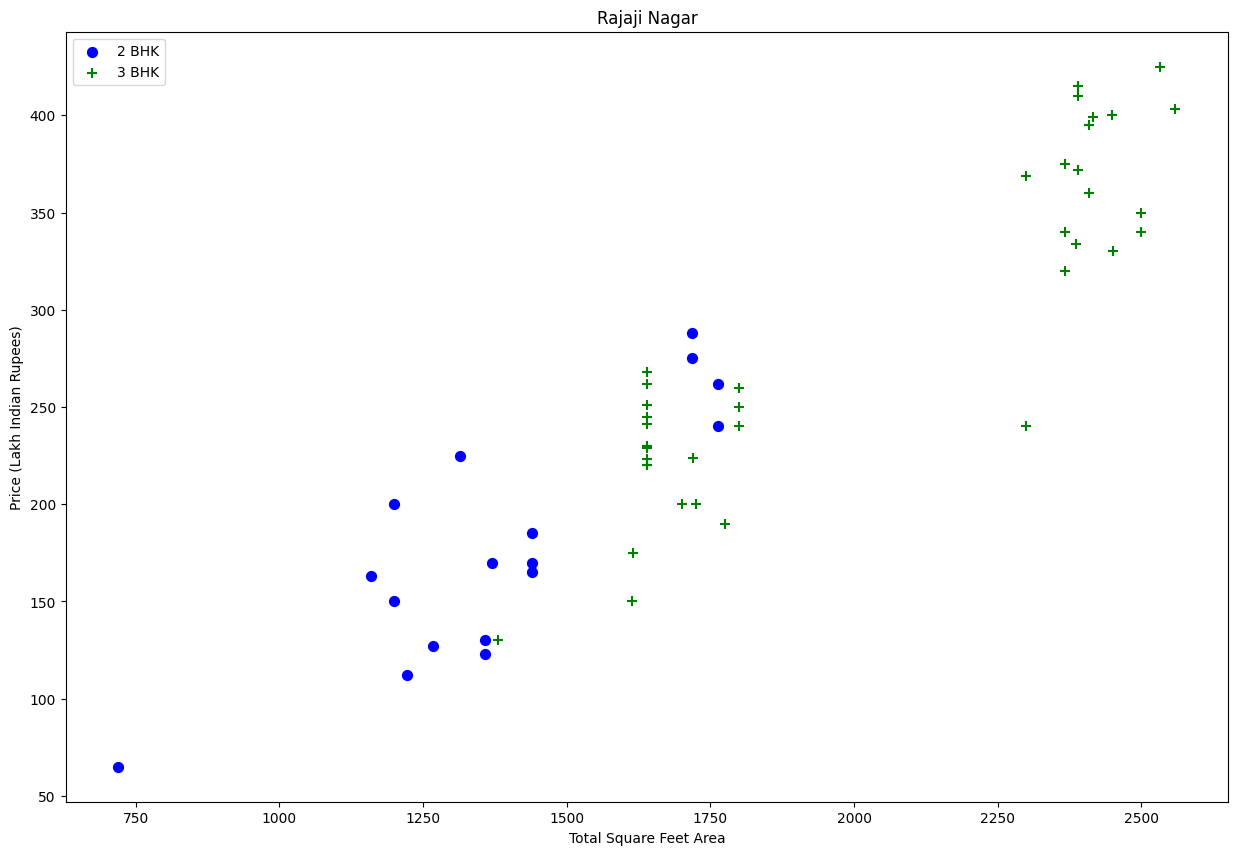

In [85]:
plot_scatter_chart(df,"Rajaji Nagar")

In [86]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

In [87]:
df = remove_bhk_outliers(df)
df.shape

(6584, 10)

Text(0, 0.5, 'Count')

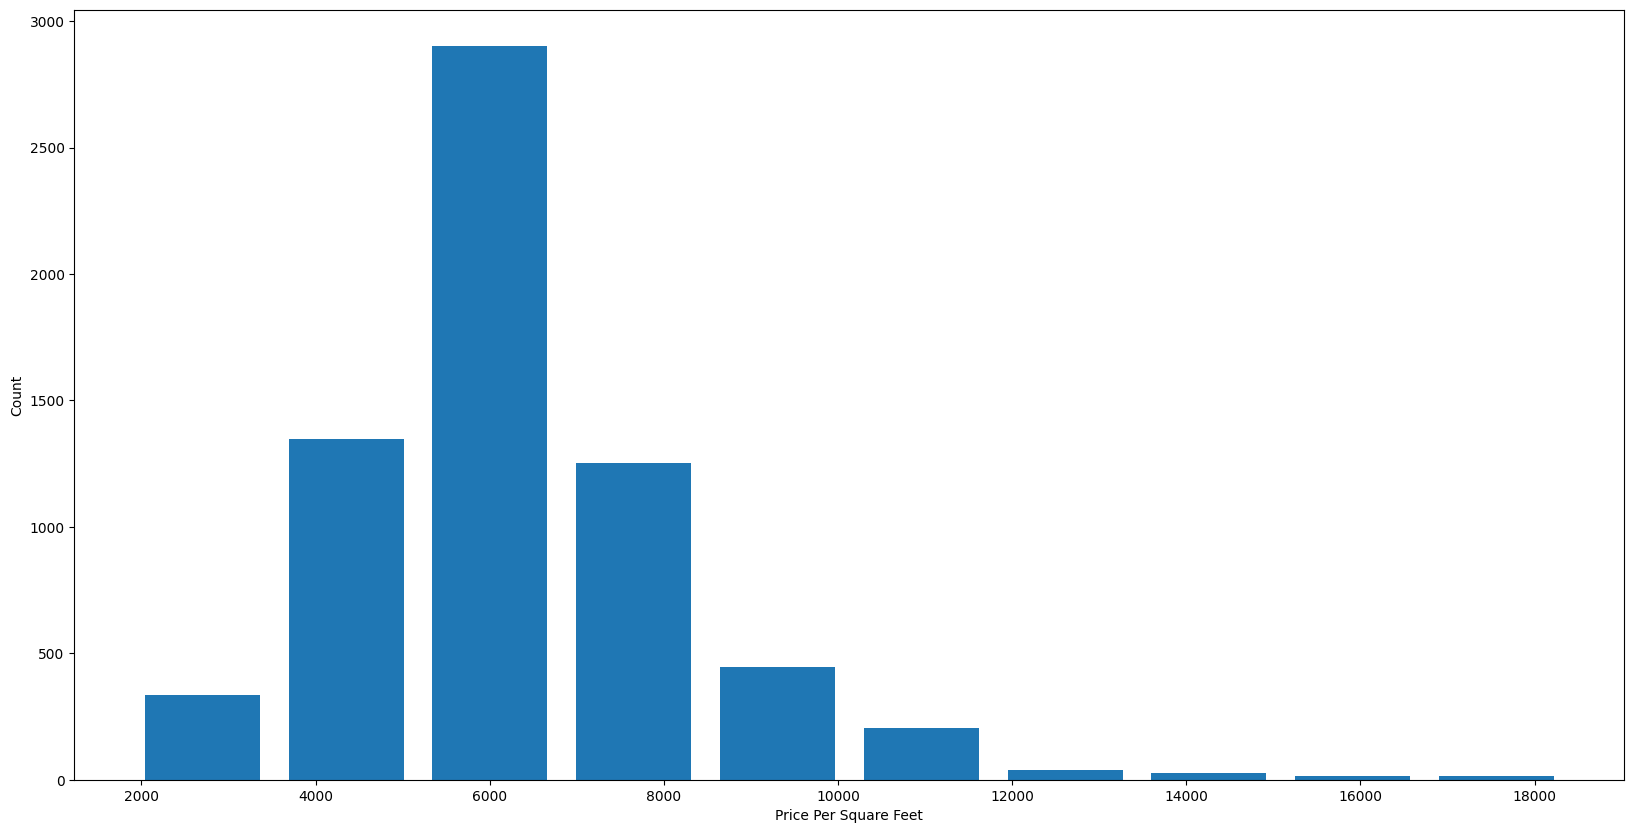

In [88]:
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

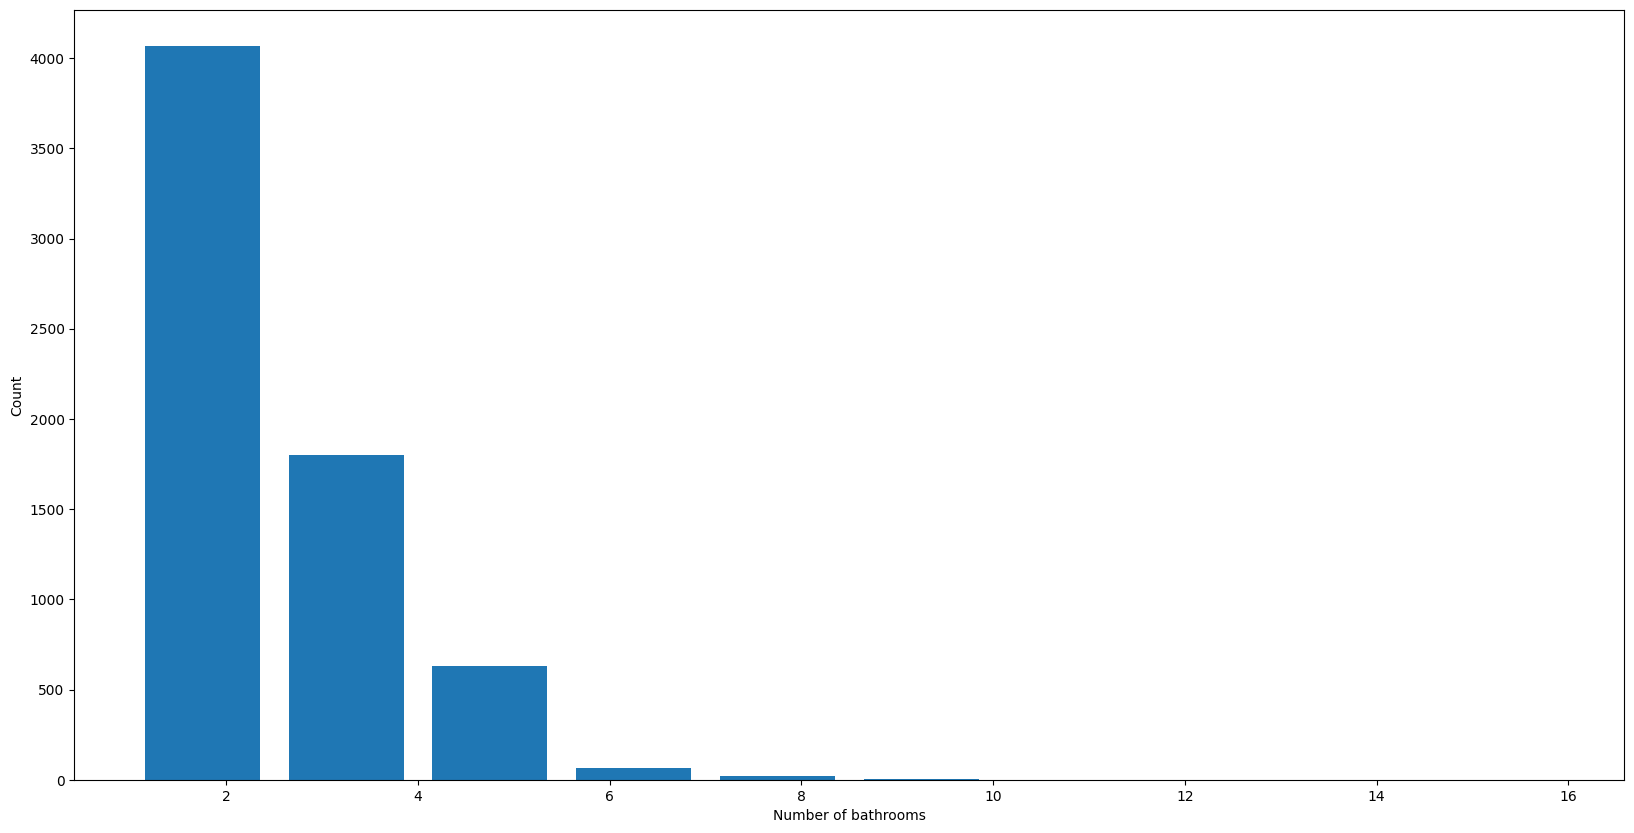

In [89]:
plt.hist(df.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [90]:
# Some houses have 13 bathrooms.Lets look more into it
df[df.bath>7].count()

area_type         15
availability      15
location          15
size              15
total_sqft        15
bath              15
balcony           15
price             15
bhk               15
price_per_sqft    15
dtype: int64

In [91]:
df = df[['area_type','location','total_sqft','bath','balcony','bhk','price']]
df

,area_type,location,total_sqft,bath,balcony,bhk,price
0,Built-up Area,7th Phase JP Nagar,1080.0,2.0,2.0,2,72.0
1,Super built-up Area,7th Phase JP Nagar,1270.0,2.0,2.0,2,93.0
2,Built-up Area,7th Phase JP Nagar,1420.0,2.0,1.0,3,100.0
3,Built-up Area,7th Phase JP Nagar,1850.0,3.0,1.0,3,150.0
4,Built-up Area,7th Phase JP Nagar,1245.0,2.0,1.0,2,94.0
...,...,...,...,...,...,...,...
10778,Built-up Area,other,1805.0,3.0,3.0,3,134.0
10779,Super built-up Area,other,1715.0,3.0,3.0,3,112.0
10780,Super built-up Area,other,3600.0,5.0,2.0,4,400.0
10781,Super built-up Area,other,4689.0,4.0,1.0,4,488.0


In [92]:
x = df.drop(columns=['price'])
y = np.log(df['price'])

In [93]:
x

,area_type,location,total_sqft,bath,balcony,bhk
0,Built-up Area,7th Phase JP Nagar,1080.0,2.0,2.0,2
1,Super built-up Area,7th Phase JP Nagar,1270.0,2.0,2.0,2
2,Built-up Area,7th Phase JP Nagar,1420.0,2.0,1.0,3
3,Built-up Area,7th Phase JP Nagar,1850.0,3.0,1.0,3
4,Built-up Area,7th Phase JP Nagar,1245.0,2.0,1.0,2
...,...,...,...,...,...,...
10778,Built-up Area,other,1805.0,3.0,3.0,3
10779,Super built-up Area,other,1715.0,3.0,3.0,3
10780,Super built-up Area,other,3600.0,5.0,2.0,4
10781,Super built-up Area,other,4689.0,4.0,1.0,4


In [94]:
y

0        4.276666
1        4.532599
2        4.605170
3        5.010635
4        4.543295
           ...   
10778    4.897840
10779    4.718499
10780    5.991465
10781    6.190315
10782    2.833213
Name: price, Length: 6584, dtype: float64

In [95]:
# train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [96]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [97]:
from sklearn.linear_model import LinearRegression
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1])
],remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7561966532004532
MAE 0.20203331997106921


In [98]:
from sklearn.neighbors import KNeighborsRegressor
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1])
],remainder='passthrough')

step2 = KNeighborsRegressor(n_neighbors=3)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8374513232652883
MAE 0.1842926117717892


In [99]:
from sklearn.tree import DecisionTreeRegressor
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1])
],remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8707057459298333
MAE 0.17367879797815028


In [104]:
from xgboost import XGBRegressor
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1])
],remainder='passthrough')

step2 = XGBRegressor(n_estimators=45,max_depth=5,learning_rate=0.5)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8953349621694259
MAE 0.15006320640509346


In [107]:
from sklearn.ensemble import GradientBoostingRegressor
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1])
],remainder='passthrough')

step2 = GradientBoostingRegressor(n_estimators=500)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.9046119605013686
MAE 0.14656678362593253
